In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [22]:
data = pd.read_csv('general.csv', ',')

In [23]:
# Remove unneeded fields
data = data.drop(["Стены", "Наименование", "Соток", "Агентство", "Пользователь", "Телефон", "Описание", "Unnamed: 0", "Realty ID", "Улица", "Город", "Область", "Дата", "Тип недвижимости", "Жилая площадь", "Кухня"], axis = 1)

In [24]:
# Remove item with price not in UAH
data = data[data["Тип цены"] == "грн"]
data = data.drop("Тип цены", axis = 1)

In [25]:
# Join same disctict spelled differently
data = data.replace("Сыхивский", "Сыховский")
data = data.replace("Лычаков", "Лычаковский")
data = data.replace("Галицкий", "Галицький")

In [26]:
# Remove districts with small amount of data
counts = data['Район'].value_counts()
data = data[data['Район'].isin(counts[counts > 30].index)]

In [27]:
# Fix headers' names
data = data.rename(columns={
    'Район': 'District',
    'Цена': 'Price',
    'Комнат': 'NumberOfRooms',
    'Этаж': 'Floor',
    'Этажность': 'FloorsInBuilding',
    'Общая площадь': 'Area',
})

In [28]:
# Divide data
train = data.sample(frac=0.6,random_state=200)
test = data.drop(train.index)
cv = test[:len(test)//2]
test = test[len(test)//2 + 1:]

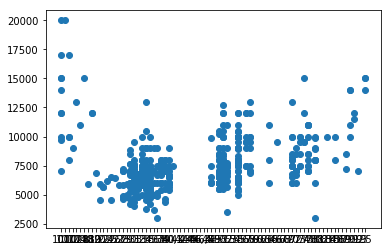

In [29]:
plt.scatter(train.Area, train.Price)
plt.show()

In [30]:
reg = linear_model.LinearRegression()

In [35]:
x = train['Area']
y = train['Price']

x = np.reshape(x , (x.shape[0] , 1))
y = np.reshape(y , (y.shape[0] , 1))

In [36]:
reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
reg.coef_

array([[ 71.7111781]])

In [46]:
x = test['Area']
x = np.reshape(x , (x.shape[0] , 1))
y = test['Price']
y = np.reshape(y , (y.shape[0] , 1))

reg.predict(y)

array([[  355124.63533837],
       [  434006.93125294],
       [  498546.99154668],
       [  484204.75592585],
       [  426835.81344253],
       [  469862.52030502],
       [  448349.16687377],
       [  484204.75592585],
       [  864273.99987788],
       [  398151.34220087],
       [  720851.64366957],
       [  398151.34220087],
       [  362295.75314879],
       [  491375.87373627],
       [  484204.75592585],
       [  541573.69840918],
       [  498546.99154668],
       [  577429.28746126],
       [  455520.28468419],
       [  469862.52030502],
       [  541573.69840918],
       [  541573.69840918],
       [  491375.87373627],
       [  498546.99154668],
       [  434006.93125294],
       [  362295.75314879],
       [  541573.69840918],
       [  756707.23272165],
       [  434006.93125294],
       [  541573.69840918],
       [  541573.69840918],
       [  434006.93125294],
       [  462691.40249461],
       [  412493.5778217 ],
       [  376637.98876962],
       [  577429.287

In [47]:
np.mean((reg.predict(x) - y)**2)

2793876.4761916776

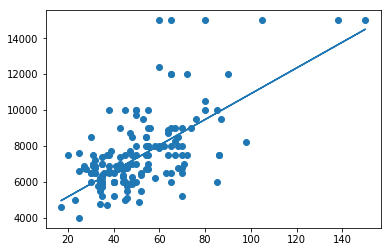

In [52]:
plt.scatter(x, y)
plt.plot(x, reg.predict(x))
plt.show()